In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

from platform import python_version

print(python_version())
print(np.__version__)
print(pd.__version__)
print(sklearn.__version__)



3.11.9
2.0.2
2.2.2
1.6.1


# Looking at our raw data

In [4]:
data_raw = pd.read_csv(".\\topic21_v9_train.csv")
data_raw

,0,1,2,3,4,brand,model,trim,body_type,fuel_type,transmission_type,engine_capacity_cc,horsepower,exterior_color,interior_color,warranty,city,seller_type,price
0,NaN,3.764959,3.686498,0.504080,2.816529,Mercedes-Benz,M-Class,ML 500,SUV,Petrol,Automatic Transmission,NaN,500 - 599 HP,White,Beige,Does not apply,Dubai,Owner,79000
1,0.500825,3.509076,14.804767,0.244597,-0.876152,Tesla,Model 3,Performance,Sedan,Electric,Automatic Transmission,500 - 999 cc,600 - 699 HP,Black,White,Yes,Dubai,Owner,168000
2,1.915838,3.711548,7.975758,0.651522,3.378688,Audi,Q7,S-line,SUV,Petrol,Automatic Transmission,3000 - 3499 cc,200 - 299 HP,Blue,Beige,Does not apply,Dubai,Owner,52500
3,0.279719,3.842128,5.903154,0.313971,2.489437,Bentley,Continental GT,Other,Soft Top Convertible,Petrol,Automatic Transmission,4000+ cc,600 - 699 HP,Orange,Black,Yes,Dubai,Dealer,1160
4,0.689781,3.613425,8.651282,0.273852,1.337020,Peugeot,508,Active,Sedan,Petrol,Automatic Transmission,1500 - 1999 cc,100 - 199 HP,Red,Beige,Yes,Dubai,Dealer,78900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7957,2.905641,NaN,23.191578,0.476294,0.206035,Land Rover,Range Rover Sport,HSE,SUV,Petrol,Automatic Transmission,3000 - 3499 cc,300 - 399 HP,Grey,Beige,No,Dubai,Dealer,90900
7958,0.434064,3.603330,11.182552,0.413911,0.114275,Renault,Talisman,SE,Sedan,Petrol,Automatic Transmission,2000 - 2499 cc,100 - 199 HP,Blue,Black,No,Dubai,Dealer,43900
7959,0.804830,3.575916,25.227375,0.345557,0.457583,Mercedes-Benz,GLE-Class,GLE 350,SUV,Petrol,Automatic Transmission,2000 - 2499 cc,200 - 299 HP,Black,Brown,Yes,Sharjah,Dealer,200000
7960,0.352151,3.602651,-0.568026,0.254414,-0.054873,Mercedes-Benz,SL-Class,Other,Soft Top Convertible,Petrol,Automatic Transmission,4000+ cc,300 - 399 HP,Grey,Unknown,Yes,Dubai,Owner,590000


In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7962 entries, 0 to 7961
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   0                   7262 non-null   float64
 1   1                   7518 non-null   float64
 2   2                   7147 non-null   float64
 3   3                   7484 non-null   float64
 4   4                   7495 non-null   float64
 5   brand               7962 non-null   object 
 6   model               7962 non-null   object 
 7   trim                7951 non-null   object 
 8   body_type           7962 non-null   object 
 9   fuel_type           7962 non-null   object 
 10  transmission_type   7962 non-null   object 
 11  engine_capacity_cc  6362 non-null   object 
 12  horsepower          7584 non-null   object 
 13  exterior_color      7962 non-null   object 
 14  interior_color      7962 non-null   object 
 15  warranty            7962 non-null   object 
 16  city  

### Deep Look

In [6]:
data_raw['trim'].value_counts(dropna=True)

trim
Other               1586
Standard             348
S                    226
SE                   187
G 63 AMG             125
                    ... 
Full                   1
230i Convertible       1
650i Gran Coupe        1
CLK 350                1
M8 Convertible         1
Name: count, Length: 764, dtype: int64

In [7]:
data_raw['model'].value_counts(dropna=True)

model
Range Rover          213
S-Class              179
Range Rover Sport    157
G-Class              149
C-Class              146
                    ... 
P1                     1
GTC4 Lusso T           1
Fiesta                 1
X35                    1
CLK-Class              1
Name: count, Length: 609, dtype: int64

In [8]:
data_raw['horsepower'].value_counts(dropna=True)

horsepower
200 - 299 HP    1947
300 - 399 HP    1456
100 - 199 HP    1389
400 - 499 HP     893
500 - 599 HP     724
Unknown          515
600 - 699 HP     368
700 - 799 HP     133
0 - 99 HP         64
900+ HP           48
800 - 899 HP      47
Name: count, dtype: int64

# Data Splitting & Insights

In [9]:
from splitter import splitter
X_train, X_test, y_train, y_test = splitter(".//topic21_v9_train.csv")

NTS: X_train holds the training data (i.e features) except the prices, y_train holds the prices (i.e. target) for X_train

## Post-Split Data Insights

### Training Set info & statistics:

In [10]:
X_train.info()
X_train.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 6369 entries, 2864 to 7270
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   0                   5813 non-null   float64
 1   1                   6014 non-null   float64
 2   2                   5716 non-null   float64
 3   3                   5991 non-null   float64
 4   4                   5989 non-null   float64
 5   brand               6369 non-null   object 
 6   model               6369 non-null   object 
 7   trim                6361 non-null   object 
 8   body_type           6369 non-null   object 
 9   fuel_type           6369 non-null   object 
 10  transmission_type   6369 non-null   object 
 11  engine_capacity_cc  5078 non-null   object 
 12  horsepower          6069 non-null   object 
 13  exterior_color      6369 non-null   object 
 14  interior_color      6369 non-null   object 
 15  warranty            6369 non-null   object 
 16  city    

,0,1,2,3,4
count,5.813000e+03,6014.000000,5716.000000,5991.000000,5989.000000
mean,2.037749e+06,3.668371,9.294016,0.814258,0.832198
std,1.153898e+08,0.083244,10.151578,8.493506,2.021225
min,2.504974e-01,3.373773,-23.542864,0.144798,-7.274302
25%,4.710367e-01,3.610860,5.252979,0.262443,0.029324
50%,6.991350e-01,3.660604,10.889050,0.352959,0.986307
75%,1.203203e+00,3.721478,16.023471,0.516628,1.992085
max,7.834847e+09,3.965988,34.522370,429.455216,7.013663


NTS: nothing useful in doing describe over training features

In [11]:
print(y_train.info())
print(y_train.describe())

<class 'pandas.core.series.Series'>
Index: 6369 entries, 2864 to 7270
Series name: price
Non-Null Count  Dtype
--------------  -----
6369 non-null   int64
dtypes: int64(1)
memory usage: 99.5 KB
None
count      6369.000000
mean     164723.204271
std      190676.126189
min        1000.000000
25%       44999.000000
50%       94900.000000
75%      209900.000000
max      999900.000000
Name: price, dtype: float64


>  For my peace of mind, comparing the train prices vs the test prices:

Training set price statistics:
count      1593.000000
mean     157768.069680
std      178949.373582
min        1025.000000
25%       45000.000000
50%       90000.000000
75%      199000.000000
max      999000.000000
Name: price, dtype: float64

Testing set price statistics:
count      6369.000000
mean     164723.204271
std      190676.126189
min        1000.000000
25%       44999.000000
50%       94900.000000
75%      209900.000000
max      999900.000000
Name: price, dtype: float64


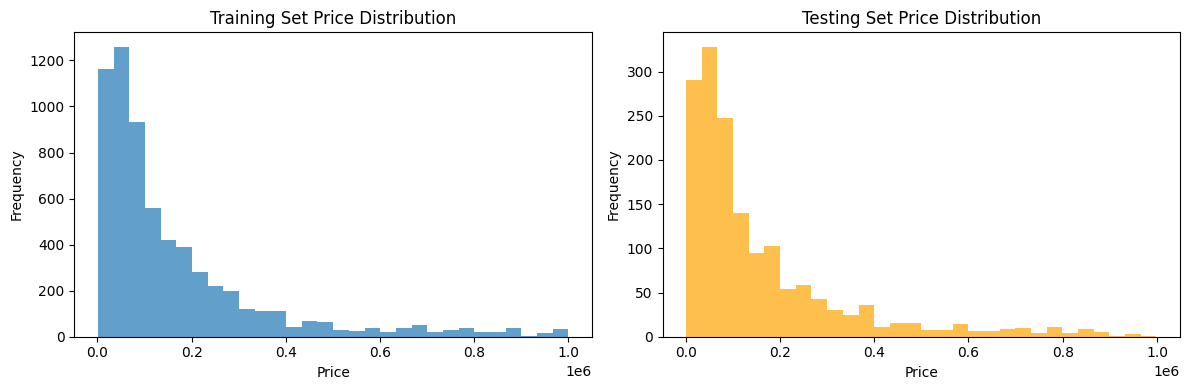

In [12]:
print("Training set price statistics:")
print(y_test.describe())
print("\nTesting set price statistics:")
print(y_train.describe())

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=30, alpha=0.7, label='Training')
plt.title('Training Set Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(y_test, bins=30, alpha=0.7, label='Testing', color='orange')
plt.title('Testing Set Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Insights: Nothing useful here, just nice to see that everything is balanced . Ofcourse !! NOT to be included in final NB

### Checking missing/duplicate/unique values:

In [26]:
#missing values
print("Missing values in training features:")
print(X_train.isnull().sum())
print("\nMissing values in training prices:")
print(y_train.isnull().sum())

#duplicate values
print("\nDuplicate rows in training features:")
print(X_train.duplicated().sum())
print("\nDetailed breakdown")
print(X_train[X_train.duplicated()])

print("\nDuplicate rows in training prices:")
print(y_train.duplicated().sum())
print("\nDetailed breakdown")
print(y_train[y_train.duplicated()])

#unique values
print("\nUnique values in the training features set:")
print(X_train.nunique())


Missing values in training features:
0                      556
1                      355
2                      653
3                      378
4                      380
brand                    0
model                    0
trim                     8
body_type                0
fuel_type                0
transmission_type        0
engine_capacity_cc    1291
horsepower             300
exterior_color           0
interior_color           0
warranty                 0
city                     0
seller_type              0
dtype: int64

Missing values in training prices:
0

Duplicate rows in training features:
0

Detailed breakdown
Empty DataFrame
Columns: [0, 1, 2, 3, 4, brand, model, trim, body_type, fuel_type, transmission_type, engine_capacity_cc, horsepower, exterior_color, interior_color, warranty, city, seller_type]
Index: []

Duplicate rows in training prices:
5202

Detailed breakdown
4519     30000
121     135000
3025    109000
5331     27000
4819     55000
         ...  
5226    43

> Insights: We have a lot of missing engine_capacity_cc (1291) and horsepower (300) values, so we need to think about what to do with those. Moreover, what the frick do we do with 0,1,2,3,4 and their missing values??

> Good news: No missing Prices in training data!

> and No duplicate data in training features!

NTS, Total features: 6369

What we need to do:

- Standardization because i.e. mileage goes from 0-200k for example; whereas year values range from 1990-2025

### Correlation Bonanza !

#### Correlation Notes:

> There are some important nuances about correlation that many beginners overlook, and understanding these will make you a more sophisticated data analyst. First, correlation only captures linear relationships. Two variables might have a strong curved relationship that correlation analysis would miss entirely. For example, a car's age might have a non-linear relationship with price where very new cars and very old classic cars are both expensive, while middle-aged cars are cheapest.

>Second, correlation does not imply causation, which is perhaps the most frequently misunderstood concept in data analysis. Just because two variables are correlated doesn't mean one causes the other. There might be hidden factors influencing both variables, or the relationship might be coincidental. In your car data, you might find that cars with sunroofs correlate with higher prices, but this doesn't mean sunroofs cause higher prices - it might be that luxury cars are more likely to have both sunroofs and higher prices due to their premium positioning.

> Look for features w/ corr > 0.3 w/ price

> Goes without saying, but corr should only be ran on Training data !!

Multicollinearity:
>Pay special attention to the correlations between your input features themselves, not just their relationships with price. If two input features are highly correlated with each other (say, correlation above 0.8), this creates a condition called multicollinearity that can cause problems for some machine learning algorithms. For instance, if your dataset includes both "engine displacement" and "engine power," these might be highly correlated since larger engines typically produce more power.
The scatter plots in the analysis will reveal whether the relationships between features and price are truly linear or if there are more complex patterns at play. You might discover that the relationship between car age and price follows a curve rather than a straight line, suggesting that you might benefit from feature engineering techniques like polynomial features or logarithmic transformations

Technical Stuff:
> ```.corr()``` from pandas only works with numerical data and uses the Pearson correlation which measures linear relationships. If we want to detect monotonic relationships that aren't necessarily linear, then "Spearman correlation" becomes valuable. Pass ```method='pearson/spearman``` explicitly as a parameter to choose. 

>You only need to explore more sophisticated approaches like Spearman correlation or partial correlation when you have specific reasons to suspect that simple linear correlation isn't telling the complete story.

In [14]:
correlation_matrix = X_train.select_dtypes(include='number').corr() # only looking at numerical corr

# Combining the features and the target for complete analysis
train_with_target = X_train.copy()
train_with_target['price'] = y_train

# Getting correlations with price specifically
numeric_train = train_with_target.select_dtypes(include='number')
price_correlations = numeric_train.corr()['price'].drop('price')
print(price_correlations.sort_values(key=abs, ascending=False))

1    0.277723
2   -0.201316
4    0.050619
3    0.019822
0   -0.012433
Name: price, dtype: float64


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

# Assuming your data is in pandas DataFrames
# If not, convert them first: 
X_train = pd.DataFrame(X_train), y_train = pd.Series(y_train)

def analyze_numerical_correlations(X_train, y_train):
    """
    Comprehensive numerical correlation analysis for ML training data
    """
    
    # Step 1: Identify numerical columns only
    # This filters out categorical columns automatically
    numerical_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
    
    print(f"Found {len(numerical_cols)} numerical columns: {numerical_cols}")
    
    # Extract only numerical features for correlation analysis
    X_numerical = X_train[numerical_cols]
    
    # Step 2: Feature-to-Feature Correlation Matrix
    print("\n=== FEATURE-TO-FEATURE CORRELATIONS ===")
    
    # Calculate Pearson correlation matrix
    feature_corr_matrix = X_numerical.corr()
    
    # Display correlation matrix
    print("\nCorrelation Matrix:")
    print(feature_corr_matrix.round(3))
    
    # Step 3: Visualize feature correlations with heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(feature_corr_matrix, 
                annot=True,           # Show correlation values
                cmap='RdBu_r',        # Red-Blue color scheme (red=positive, blue=negative)
                center=0,             # Center colormap at 0
                square=True,          # Make cells square-shaped
                fmt='.2f')            # Format numbers to 2 decimal places
    plt.title('Feature-to-Feature Correlation Heatmap')
    plt.tight_layout()
    plt.show()
    
    # Step 4: Identify highly correlated feature pairs
    # Find pairs with correlation > 0.8 or < -0.8 (strong correlation)
    high_corr_pairs = []
    for i in range(len(feature_corr_matrix.columns)):
        for j in range(i+1, len(feature_corr_matrix.columns)):
            corr_value = feature_corr_matrix.iloc[i, j]
            if abs(corr_value) > 0.8:  # Threshold for strong correlation
                high_corr_pairs.append({
                    'Feature_1': feature_corr_matrix.columns[i],
                    'Feature_2': feature_corr_matrix.columns[j],
                    'Correlation': corr_value
                })
    
    if high_corr_pairs:
        print(f"\n Found {len(high_corr_pairs)} highly correlated feature pairs (|r| > 0.8):")
        for pair in high_corr_pairs:
            print(f"  {pair['Feature_1']} ↔ {pair['Feature_2']}: {pair['Correlation']:.3f}")
        print("  Consider removing one feature from each pair to reduce multicollinearity")
    else:
        print("\n No highly correlated feature pairs found (|r| > 0.8)")
    
    # Step 5: Feature-to-Target Correlations
    print(f"\n=== FEATURE-TO-TARGET CORRELATIONS ===")
    
    # Calculate correlations with target variable
    target_correlations = []
    for col in numerical_cols:
        # Pearson correlation (linear relationships)
        pearson_corr, pearson_p = pearsonr(X_numerical[col], y_train)
        
        # Spearman correlation (monotonic relationships, more robust)
        spearman_corr, spearman_p = spearmanr(X_numerical[col], y_train)
        
        target_correlations.append({
            'Feature': col,
            'Pearson_Correlation': pearson_corr,
            'Pearson_p_value': pearson_p,
            'Spearman_Correlation': spearman_corr,
            'Spearman_p_value': spearman_p
        })
    
    # Convert to DataFrame for easier viewing
    target_corr_df = pd.DataFrame(target_correlations)
    target_corr_df = target_corr_df.sort_values('Pearson_Correlation', key=abs, ascending=False)
    
    print("\nFeature-to-Target Correlations (sorted by absolute Pearson correlation):")
    print(target_corr_df.round(4))
    
    # Step 6: Visualize feature-to-target correlations
    plt.figure(figsize=(12, 6))
    
    # Create bar plot of correlations
    features = target_corr_df['Feature']
    pearson_corrs = target_corr_df['Pearson_Correlation']
    
    colors = ['red' if x < 0 else 'blue' for x in pearson_corrs]
    
    plt.barh(range(len(features)), pearson_corrs, color=colors, alpha=0.7)
    plt.yticks(range(len(features)), features)
    plt.xlabel('Pearson Correlation with Target')
    plt.title('Feature-to-Target Variable Correlations')
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Step 7: Identify most predictive features
    strong_predictors = target_corr_df[abs(target_corr_df['Pearson_Correlation']) > 0.3]
    
    if len(strong_predictors) > 0:
        print(f"\n🎯 Strong predictive features (|r| > 0.3):")
        for _, row in strong_predictors.iterrows():
            direction = "positively" if row['Pearson_Correlation'] > 0 else "negatively"
            print(f"  {row['Feature']}: {row['Pearson_Correlation']:.3f} ({direction} correlated)")
    else:
        print(f"\n  No features show strong linear correlation with target (|r| > 0.3)")
        print("  This might indicate:")
        print("  • Non-linear relationships exist")
        print("  • Target variable might be influenced by feature combinations")
        print("  • Consider feature engineering or non-linear models")
    
    return feature_corr_matrix, target_corr_df

# Run the analysis
# Make sure your data is in the right format first
feature_correlations, target_correlations = analyze_numerical_correlations(X_train, y_train)

# Optional: Additional analysis for specific insights
print("\n=== ADDITIONAL INSIGHTS ===")

# Check for potential multicollinearity issues
print(f"Number of feature pairs with correlation > 0.7: {(abs(feature_correlations) > 0.7).sum().sum() - len(feature_correlations)}")
print(f"Number of feature pairs with correlation > 0.9: {(abs(feature_correlations) > 0.9).sum().sum() - len(feature_correlations)}")

# Summary statistics
print(f"\nTarget correlation summary:")
print(f"  Highest positive correlation: {target_correlations['Pearson_Correlation'].max():.3f}")
print(f"  Highest negative correlation: {target_correlations['Pearson_Correlation'].min():.3f}")
print(f"  Mean absolute correlation: {abs(target_correlations['Pearson_Correlation']).mean():.3f}")

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (2314783443.py, line 9)

In [ ]:
# Step 1: Quick correlation overview
print("Top 10 features correlated with price:")
price_corr = train_with_target.corr()['price'].drop('price')
print(price_corr.abs().sort_values(ascending=False).head(10))

# Step 2: Visual correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(train_with_target.corr(), 
            annot=True, cmap='coolwarm', center=0)
plt.show()

# Step 3: Focused analysis on strongest correlations
strong_features = price_corr[abs(price_corr) > 0.3].index
print(f"Features with correlation > 0.3: {list(strong_features)}")

Top 10 features correlated with price:


ValueError: could not convert string to float: 'GMC'